# Clustering Pixels in WSI Using KMeans

**Gagan Daroach** 

In [1]:
import os
import cv2
import tensorflow as tf
import numpy as np
from sklearn.cluster import KMeans
%matplotlib inline
from matplotlib import pyplot as plt
from datetime import datetime

In [101]:
input_img = '/code/research/images/mcw_he_stylegan_fakes/random_9_480.png'
input_img2 = '/code/research/images/mcw_he_stylegan_fakes/random_7_980.png'

In [107]:
img = cv2.imread(input_img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img2 = cv2.imread(input_img2)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

In [2]:
def create_image_mask(img):
    img_pixel_list = img.reshape((img.shape[0] * img.shape[1], 3))
    cluster = KMeans(2)
    cluster.fit(img_pixel_list)
    pixel_labels = cluster.labels_
    img_mask = pixel_labels.reshape((img.shape[0],img.shape[1]))
    return img_mask

def plot_image_and_mask(img):
    img_mask = create_image_mask(img)
    
    fig, ax = plt.subplots(1,2, figsize=(20,10))
        
    ax[0].imshow(img)
    ax[1].imshow(img_mask)
    plt.title('Image (Left) and Mask (Right)')
    plt.show()

## Clustering on our 1024 x 1024 fake images
~ 2mb in size

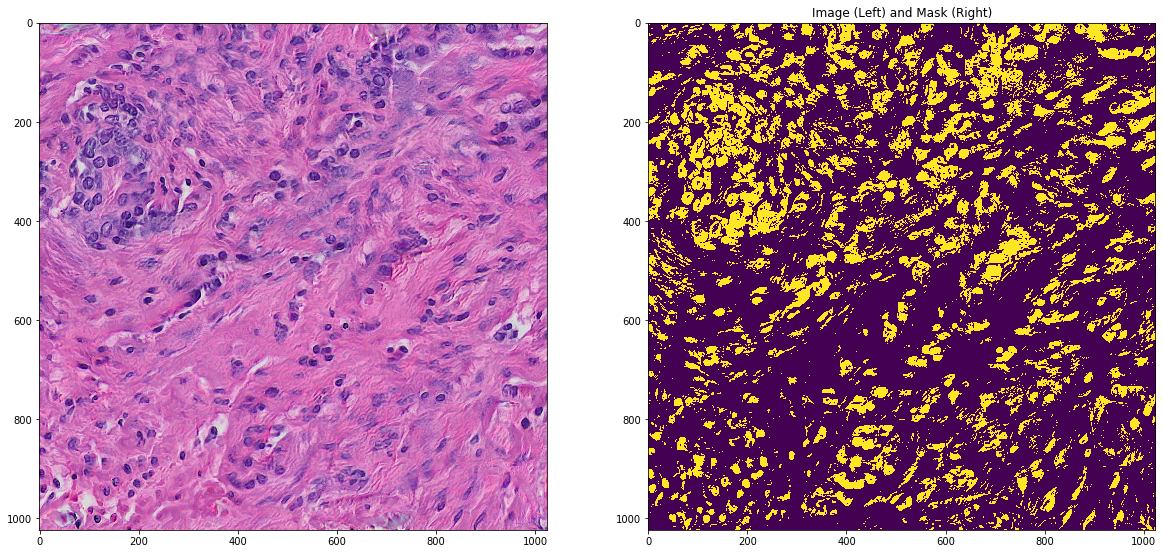

In [109]:
plot_image_and_mask(img)

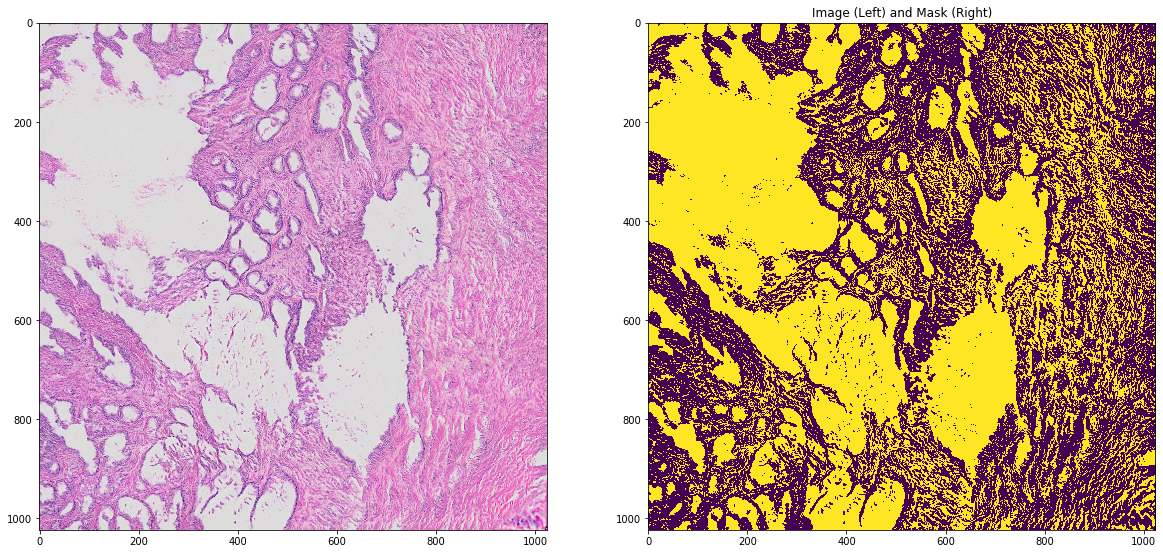

In [110]:
plot_image_and_mask(img2)

## Clustering on MCW tile_xxxx_yyyy.tiff
~ 20mb ea

In [115]:
mcw_tiles_dir = '/code/research/images/mcw_wsi/tiles'

tile_x001_y024.tiff


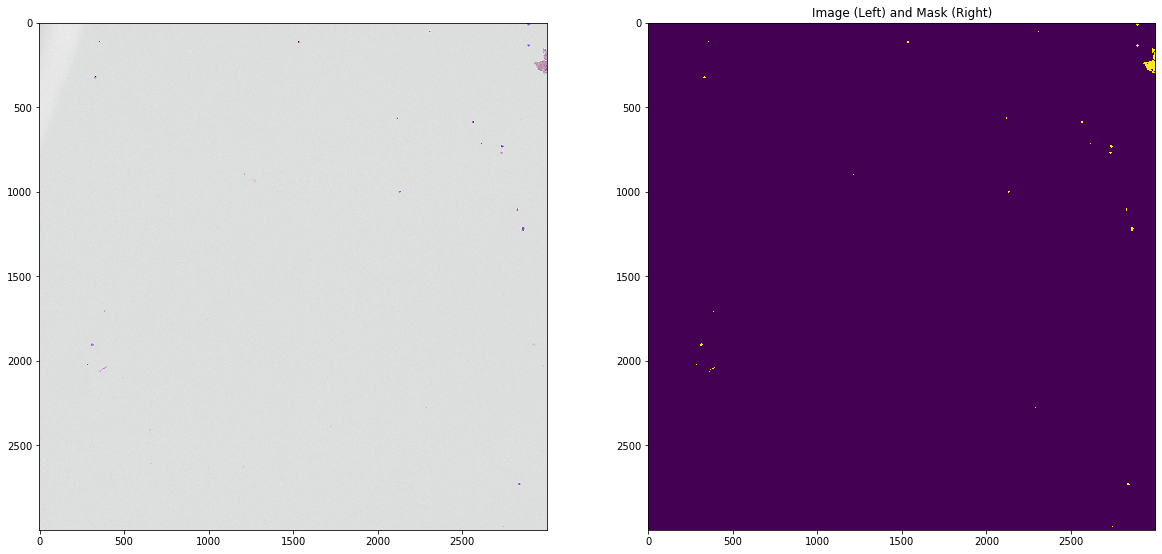

time elapsed: 27
tile_x026_y019.tiff


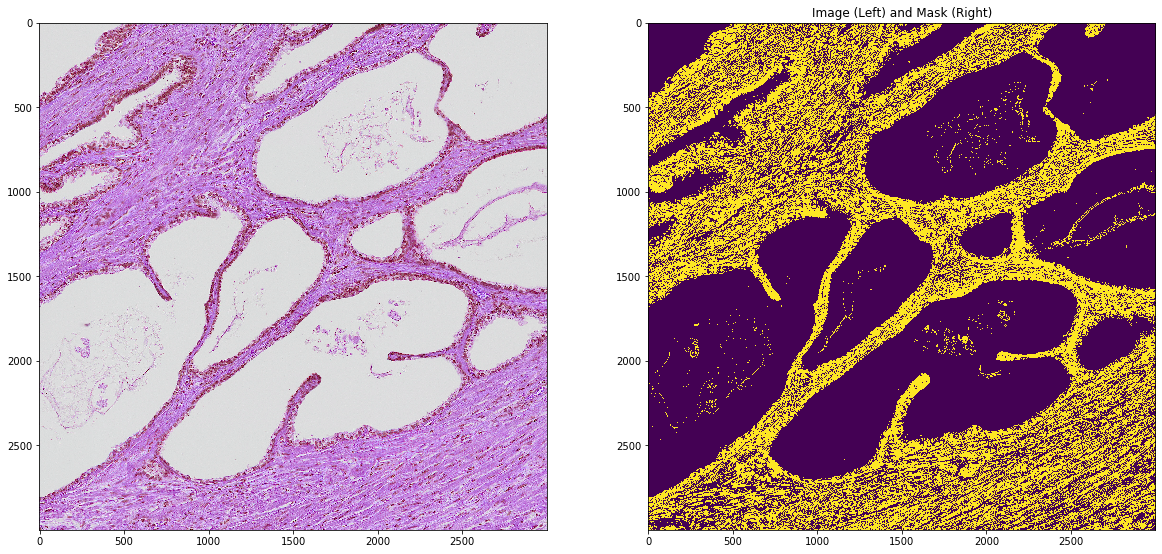

time elapsed: 40
tile_x019_y010.tiff


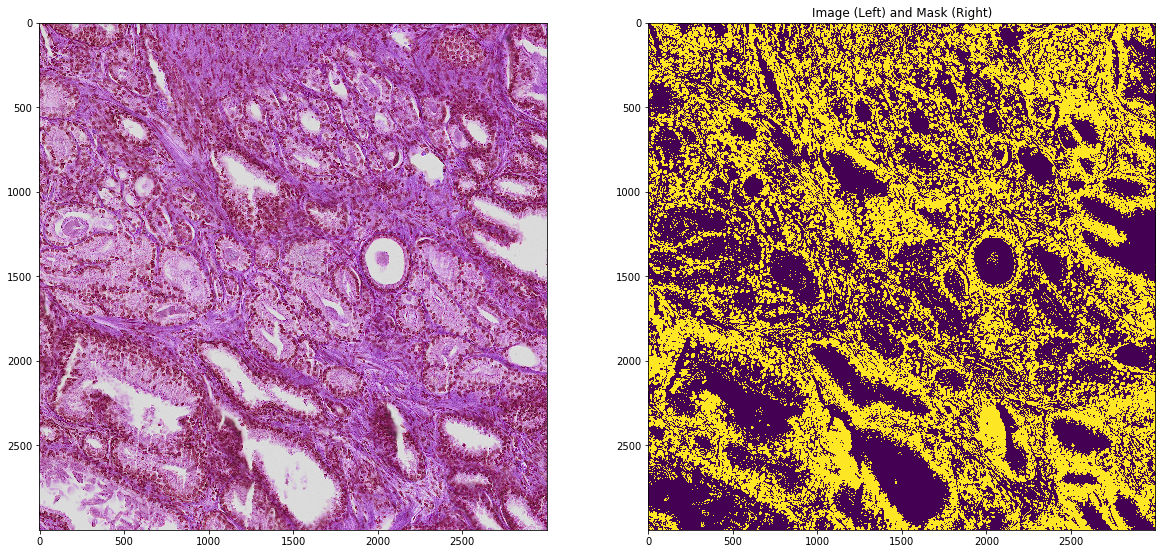

time elapsed: 50
tile_x001_y018.tiff


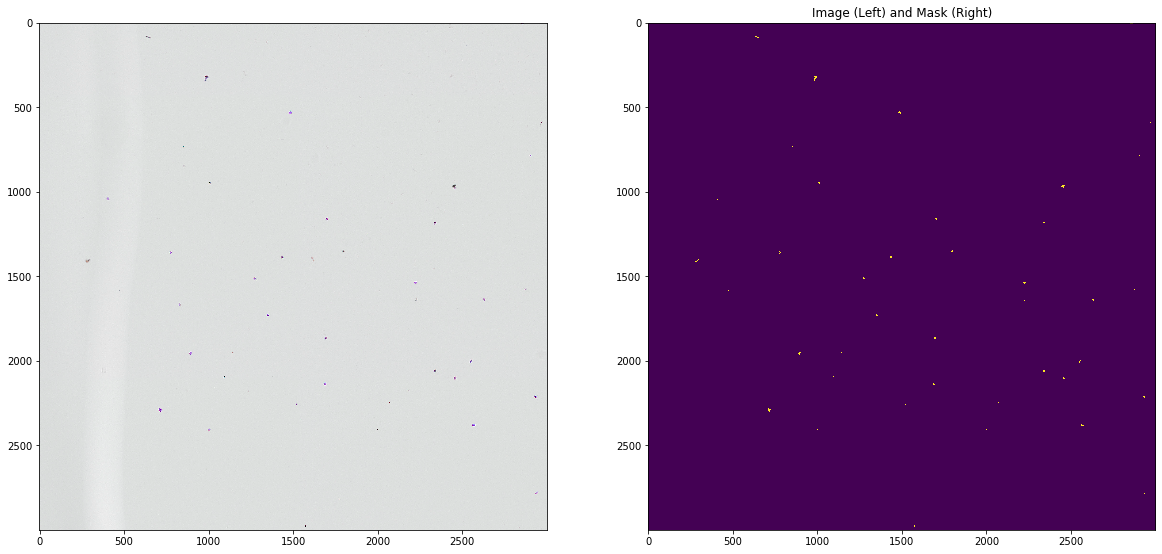

time elapsed: 31
tile_x019_y012.tiff


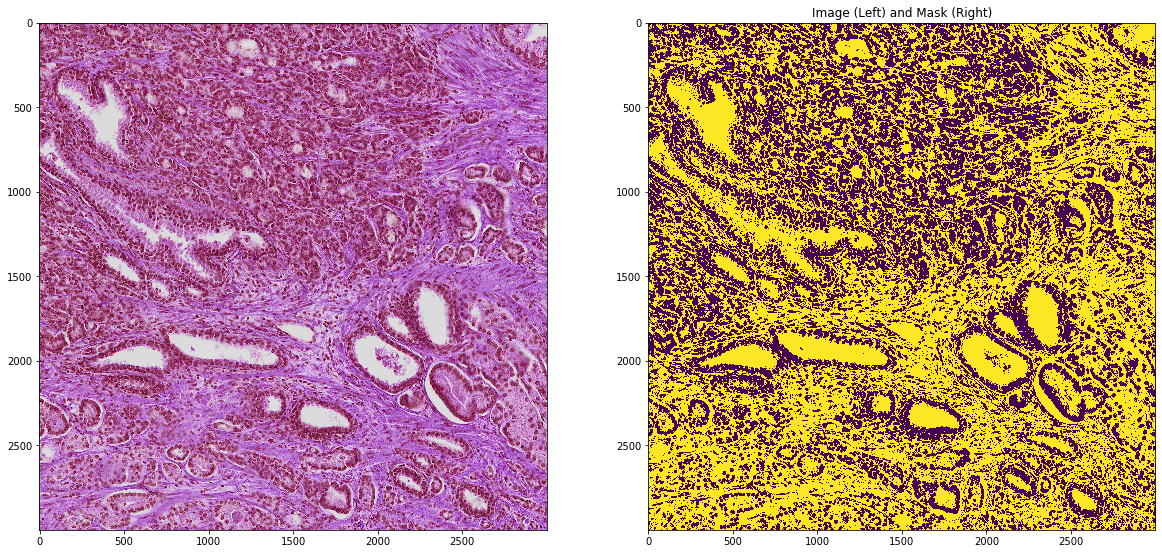

time elapsed: 39
tile_x019_y011.tiff


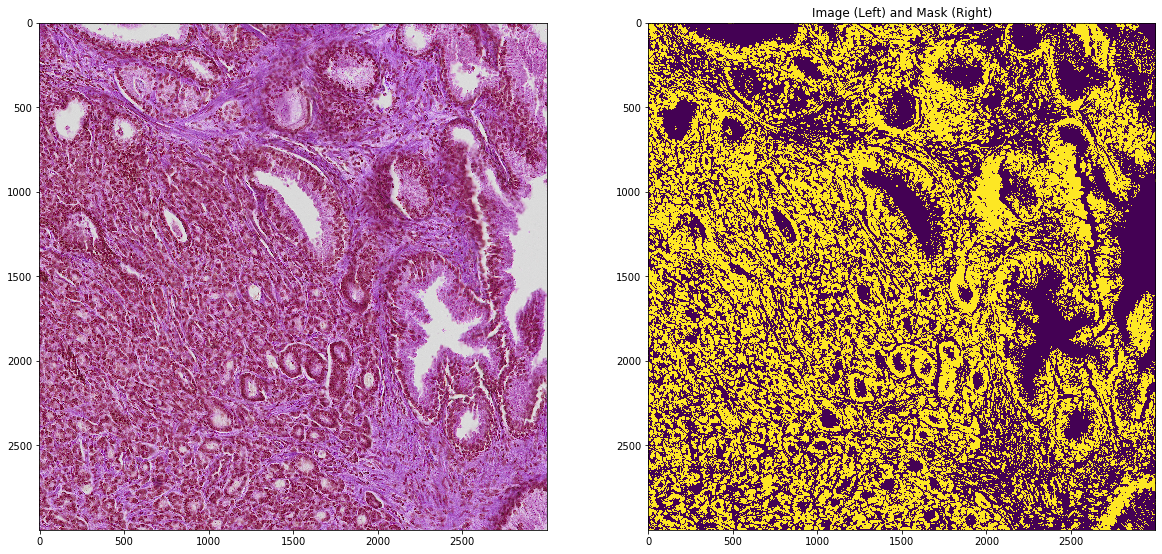

time elapsed: 41
tile_x003_y011.tiff


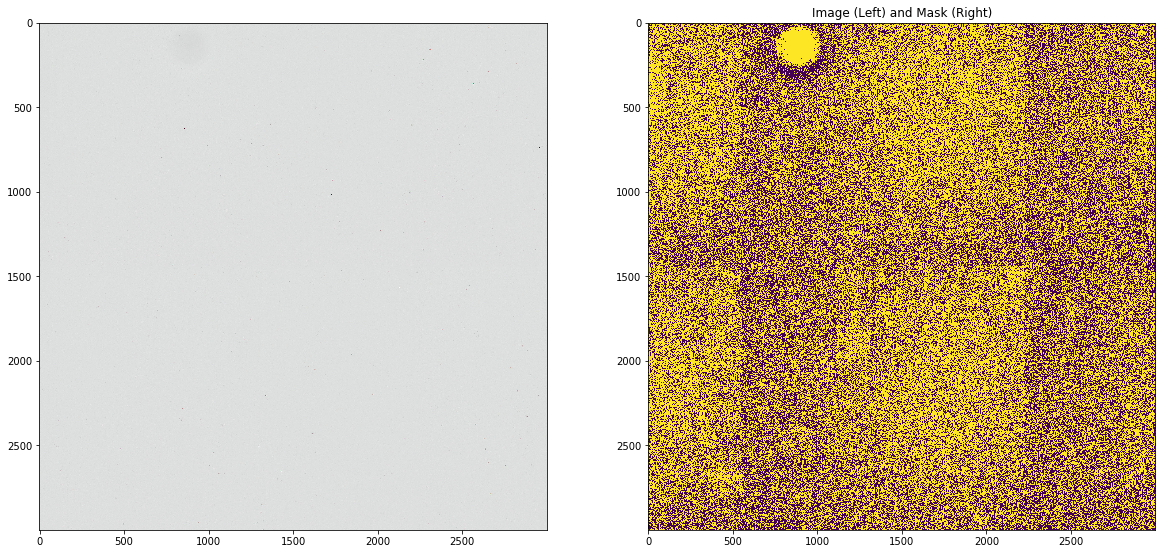

time elapsed: 27


In [117]:
for subdir, dirs, files in os.walk(mcw_tiles_dir):
    for file in files:
        filepath = os.path.join(subdir, file)
        img = cv2.imread(filepath)
        print(file)
        start_time = datetime.now()
        plot_image_and_mask(img)
        run_time = datetime.now() - start_time
        print(f'time elapsed: {run_time.seconds}')

## Clustering on MCW WSI

~ 400mb each

Out of Memory Errors on my Laptop. I had to run this on Rosie. 

In [4]:
mcw_wsi_dir = '/srv/tank/mcw/wsi'

In [5]:
for subdir, dirs, files in os.walk(mcw_wsi_dir):
    for file in files:
        filepath = os.path.join(subdir, file)
        img = cv2.imread(filepath)
        print(file)
        start_time = datetime.now()
        plot_image_and_mask(img)
        run_time = datetime.now() - start_time
        print(f'time elapsed: {run_time.seconds}')

211_13.tiff


KeyboardInterrupt: 